TEXT CLASSIFICATION

In [2]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

{}

In [3]:
!ls

sample_data


In [4]:
!pwd

/content


In [0]:
!mkdir .kaggle

In [0]:
!mkdir ~/.kaggle

In [0]:
import json
token = {"username":"esanvsh","key":"e775fe8cb15ba2c73f5fbbd778b35d3a"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

In [8]:
!kaggle kernels list user 'esanvsh' - sort-by dateRun

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [10]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [12]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-11 13:32:24          48572  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           2705  
fireballbyedimyrnmom/us-counties-covid-19-dataset              US counties COVID 19 dataset                        404KB  2020-04-12 12:09:04           3034  
ryanxjhan/cbc-news-coronavirus-articles-march-26               CBC News Coronavirus/COVID-19 Articles (NLP)          6MB  2020-03-27 23:23:07            639  
bappekim/air-pollution-in-seoul               

In [13]:
!kaggle datasets list -s jigsaw

ref                                                       title                                               size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
kashnitsky/jigsaw-multilingual-toxic-test-translated      Jigsaw multilingual toxic - test & val translated   25MB  2020-03-30 16:04:03            154  
fizzbuzz/cleaned-toxic-comments                           Cleaned Toxic Comments                              44MB  2018-03-12 05:12:31           1550  
jigsaw-team/wikipedia-talk-labels-personal-attacks        Wikipedia Talk Labels: Personal Attacks             24MB  2018-10-31 10:30:49            117  
nicapotato/bad-bad-words                                  Bad Bad Words                                        7KB  2018-02-21 21:31:20           1200  
shivajbd/jigsawpuzzle                                     Jigsaw-Puzzle           

In [14]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge -p /content

 68% 18.0M/26.3M [00:00<00:00, 46.9MB/s]
100% 26.3M/26.3M [00:00<00:00, 88.0MB/s]
  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 87.5MB/s]
  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 93.5MB/s]
 38% 9.00M/23.4M [00:00<00:00, 25.7MB/s]
100% 23.4M/23.4M [00:00<00:00, 47.7MB/s]


In [15]:
!ls

sample_data		   test.csv.zip		train.csv.zip
sample_submission.csv.zip  test_labels.csv.zip


In [0]:
!mkdir test
!chmod 777 test

In [0]:
!mkdir train
!chmod 777 train

In [18]:
!unzip test.csv.zip -d ./test

Archive:  test.csv.zip
  inflating: ./test/test.csv         


In [19]:
!unzip train.csv.zip -d ./train

Archive:  train.csv.zip
  inflating: ./train/train.csv       


In [20]:
!ls

sample_data		   test		 test_labels.csv.zip  train.csv.zip
sample_submission.csv.zip  test.csv.zip  train


In [21]:
!ls test
!ls train

test.csv
train.csv


ABOUT DATA

###Data Overview:
The dataset here is from wiki corpus dataset which was rated by human raters for toxicity. The corpus contains 63M comments from discussions relating to user pages and articles dating from 2004-2015.

Different platforms/sites can have different standards for their toxic screening process. Hence the comments are tagged in the following five categories

toxic
severe_toxic
obscene
threat
insult
identity_hate
The tagging was done via crowdsourcing which means that the dataset was rated by different people and the tagging might not be 100% accurate too.

In [22]:
!pip install scipy

In [23]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
import PIL
from skimage.io import imread
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
train = pd.read_csv("train/train.csv")
test = pd.read_csv("test/test.csv")

In [25]:
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [26]:
test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [26]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,85dab92c77225ed0,this page is a load of crap
freq,1,1


In [28]:
x=train.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)
#count number of clean entries
train['clean'].sum()
print("Total comments = ",len(train))
print('comments without any tags as clean')
print("Total clean comments = ",train['clean'].sum())
print("Total tags =",x.sum())

Total comments =  159571
comments without any tags as clean
Total clean comments =  143346
Total tags = 35098


In [29]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
train["comment_text"].fillna("unknown", inplace=True)
test["comment_text"].fillna("unknown", inplace=True)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
Check for missing values in Test dataset
id              0
comment_text    0
dtype: int64
filling NA with "unknown"


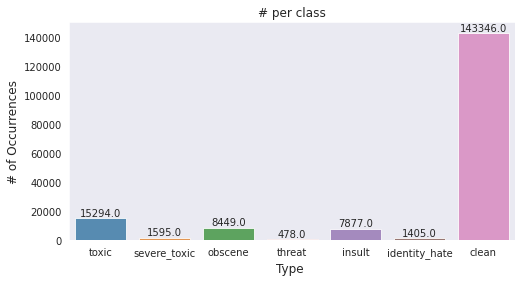

In [30]:
x=train.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

The toxicity is not evenly spread out across classes. Hence we might face class imbalance problems

There are ~95k comments in the training dataset and there are ~21 k tags and ~86k clean comments!?

This is only possible when multiple tags are associated with each comment (eg) a comment can be classified as both toxic and obscene.

### MULTI TAGGING

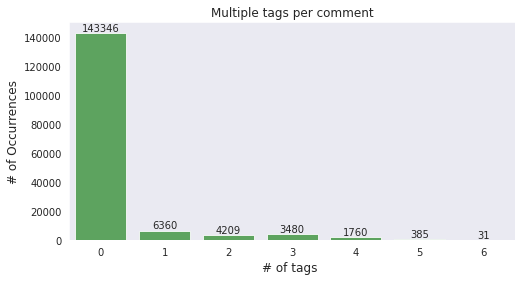

In [31]:
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[2])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()


### Which TAG go together
Now let's have a look at how often the tags occur together. A good indicator of that would be a correlation plot.

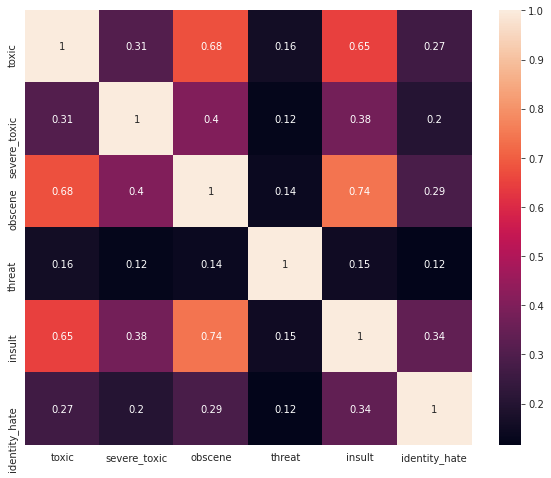

In [32]:
temp_df=train.iloc[:,2:-1]
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

The above plot indicates a pattern of co-occurance but Pandas's default Corr function which uses Pearson correlation does not apply here, since the variables invovled are Categorical (binary) variables.

So, to find a pattern between two categorical variables we can use other tools like

Confusion matrix/Crosstab

Cramer's V Statistic

Cramer's V stat is an extension of the chi-square test where the extent/strength of association is also measured

In [0]:
# https://pandas.pydata.org/pandas-docs/stable/style.html
def highlight_min(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_max = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

In [34]:
#Crosstab
# Since technically a crosstab between all 6 classes is impossible to vizualize, lets take a 
# look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
out = out.style.apply(highlight_min,axis=0)
out

The above table represents the Crosstab/ consufion matix of Toxic comments with the other classes.

Some interesting observations:

A Severe toxic comment is always toxic

Other classes seem to be a subset of toxic barring a few exceptions

### Wordclouds - Frequent words:
Now, let's take a look at words that are associated with these classes.

Chart Desc: The visuals here are word clouds (ie) more frequent words appear bigger. A cool way to create word clouds with funky pics is given here. It involves the following steps.

* Search for an image and its base 64 encoding
* Paste encoding in a cell and convert it using codecs package to image
* Create word cloud with the new image as a mask
A simpler way would be to create a new kaggle dataset and import images from there.

In [38]:
from google.colab import files
files.upload()

Saving safe-zone.png to safe-zone.png


{'safe-zone.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x04\x00\x00\x00^q\x1cq\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x02bKGD\x00\x00\xaa\x8d#2\x00\x00\x00\tpHYs\x00\x00\r\xd7\x00\x00\r\xd7\x01B(\x9bx\x00\x00EwIDATx\xda\xed\x9dw\x98U\xd5\xd5\xc6\xdf=t\xa4\x89\xa0(\x88\xd2\x04\x05\x11\x02\x82\x02*\nvD\xb1\xc5X\x08\xc6n\x0c\xd1\x18c\xf9\xac\xd1h\xa2\xc6n\x94\xd8c\xb0\x04[\x14\x15\x0b\x08FADDDD:*\n( \xd2\x19f\xe6\xfd\xfe\xa0\x0e\xdc\xb9s\xef\xddk\x9du\xce\xbd\xfb\xe7\x93\'y\x92\xcc>\xeb]\xbb\xdc]\xd7r\xc8\x03X\x1f\xfd\xd0\x0f-\xd0\x04\xbb\xa2\xba\xb55\x81\xbc\xa6\x18\x0b\xb0\x10s1\x1c\xc3\xdd\xcf\xd6\xc6\xf8\xe3\xac\r\xf0\x85\x1dp\x0b\x8eA5k;\x02\x05\xc7z\xbc\x81k\xdd\x17\xd6f\xf8\x91\xe8\x01\x80\xbb\xe0\x16\x9c\x8d*\xd6v\x04\n\x96R<\x81k\xdd"k3r\'\xc1\x03\x00\xf7\xc3p4\xb3\xb6"P\xf0\xccG?7\xd9\xda\x

In [0]:
stopword=set(STOPWORDS)


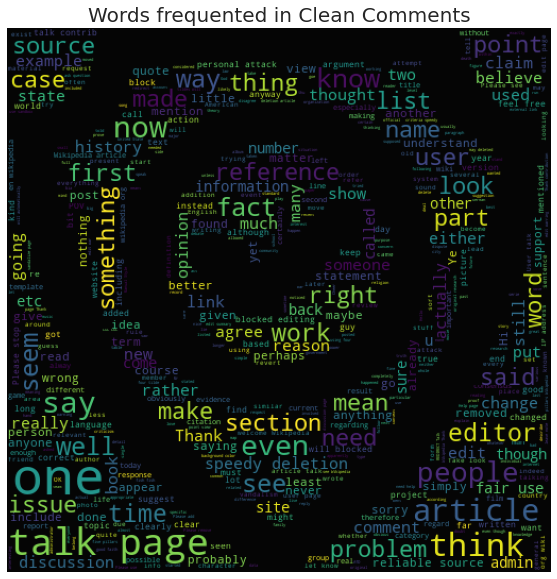

In [40]:
#clean comments
clean_mask=np.array(Image.open("safe-zone.png"))
clean_mask=clean_mask[:,:,1]
#wordcloud for clean comments
subset=train[train.clean==True]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=clean_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Clean Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

In [41]:
from google.colab import files
files.upload()

Saving anger.png to anger.png


{'anger.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x04\x00\x00\x00^q\x1cq\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x02bKGD\x00\x00\xaa\x8d#2\x00\x00\x00\tpHYs\x00\x00\r\xd7\x00\x00\r\xd7\x01B(\x9bx\x00\x00\x00\x07tIME\x07\xe1\x0c\x1b\x147\x05\xa8f\x00\x0f\x00\x00@\xb1IDATx\xda\xed\x9dw\x9c\x95\xd5\xf1\xb8\x9f]@@\x8a\x17\xa5\x08\x82.\x16\x8ab\x03\x15+\xd6\xa8\x89%\xd8\x12c\x8a\x1a\x8d\xa9_\x13M\xf23\x89&&\xa6\xab\x89Fc\x9a%E\xa3\x89J\xec-\xf6\x06\xa2\x01\x14\x91&\xc2Jo\xca\x95\xdev\xf7\xf7\x07\xbb\xb0\xe5\xd6\xf7}g\xe6\x9c\xf7\x9eg>\x89"\xf7\x9e\x999\xe7}\xe7\x9e:\xa7\n\xff\xe8A\r\xfd\xe8\xc7.\xf4k\xfcg\x86%,d!\x0bX\xd8\xf8\xcf9\xac\xb363\x10\x08$\xcbP\xbe\xc7X\xeah(*\xebx\x84\x8b\xd9\xd9\xda\xe0@ \x10\x9fv\x8c\xe2z\xde-\xe1\xc5o)\xf5\x8c\xe3\xfb\xecmm~ \x10\x88\xca`\xee`y\xd9\xaf~K\x99\xc5\xcf\xe8a

In [42]:
from google.colab import files
files.upload()

Saving biohazard-symbol.png to biohazard-symbol.png


{'biohazard-symbol.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x04\x00\x00\x00^q\x1cq\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x02bKGD\x00\x00\xaa\x8d#2\x00\x00\x00\tpHYs\x00\x00\r\xd7\x00\x00\r\xd7\x01B(\x9bx\x00\x00\x00\x07tIME\x07\xe1\x0c\x1b\x143#\x1e\x07@\xf6\x00\x008\xf3IDATx\xda\xed\x9dw|VE\x16\xb0\x9f\x04BK\x884Q@\x14\x10\x14\x11D\xaa\x14)6\xd4UQ\xb1\xb0\xea\xda+\xba\x96u-\xab\xae\xae\x9f\xee\xea\xea\xfaY\xb6\xe8\xaa\xebgYe\xc5\xde\x0b\xd8\x90\xa6"\x08H\x11\xe9\x02\x8a\x14\xa9\t\x10\x92\xbc\xdf\x1f\t%\xe4Mr\xcb\xcc\x9c{\xef{\x9e\xf3#\x84\x90w\xe6\x9c)\xe7\xce\xcc\x9d9\x03\x8a\xa2(\x8a\xa2(\x8a\xa2(\x8a\xa2(\x8a\xa2(\x8a\xa2(\x8a\xa2(\x8a\xa2(\x8a\xa2(\x8a\xa2(\x8a\xa2(\x8a\xa2(\x8a\xa2(\x8a\xa2(\x8a\xa2(\x8a\xa2D\x8dZ\xd2\n(iiFw\xf6d\x15\xa5\xd2\x8a\x18\xa0\rC\xd8\x8f\x12\xd6\x93\x92VEQ\xa2M

In [43]:
from google.colab import files
files.upload()

Saving bomb.png to bomb.png


{'bomb.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x04\x00\x00\x00^q\x1cq\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x02bKGD\x00\x00\xaa\x8d#2\x00\x00\x00\tpHYs\x00\x00\r\xd7\x00\x00\r\xd7\x01B(\x9bx\x00\x00\x00\x07tIME\x07\xe1\x0c\x1b\x15/\t"\t\xbeJ\x00\x00"\x8bIDATx\xda\xed\xddy\x9c\x15\xd5\x9d\xf7\xf1OC\x03\xb2\x88\xd8\x026\xa0\x11EDDE\xc5\rPDQ\xdc\x12\xf7\xd1\xa8\x89\xc9\xa3\x06\x9fD\xa3\xce\xc4I4\x86\xf1\xa5\x93y\x12M&\x9b1\x1aGe\xa2\x86\xa8\xb8\xc4\x05\x97D\xdc@P\xd9\x17\x05\xd9\x02\x1ae\x11\xd9\xd7n\xba\xef\xf3G\xb35\xdd}\xd7\xaa\xfa\x9ds\xea\xfb>/D\xb6\xeeo\x9d{\x7f\xbf{\xaan\xdd*\x10w\x1d\xc9\xef\xe8h\x1dBDl\xb4#\xc3jne\x0f\xeb "b\xe1S2d\xf8\x84\xabhf\x1dED\x92\xf6w2\xdb\xc64\xce\xb0\x0e#"\xc9\xbawG\x03\xc8\x90\xe1U\x8e\x8c\xe5\xbb\xf4\xa1\x95\xf5\x86\x8aHC\xd7\xd7k\x00\x19j\x18A\xb7\x08\xbf~

In [44]:
from google.colab import files
files.upload()

Saving gas-mask.png to gas-mask.png


{'gas-mask.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x04\x00\x00\x00^q\x1cq\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x02bKGD\x00\x00\xaa\x8d#2\x00\x00\x00\tpHYs\x00\x00\r\xd7\x00\x00\r\xd7\x01B(\x9bx\x00\x00\x00\x07tIME\x07\xe1\x0c\x1b\x144\x07mE2\xe0\x00\x00)\x89IDATx\xda\xed\xddy\xdcUU\xd9\xff\xf1\xcf}\x83\xcc\x93"\xa3\n\x08N\xe0\x80\xe2\x98\x9a\xe1\xf4hf\x96f\x839\x96\x95CZ\x8fOi\x9aY\xfaX\x99\xfe\xd2F\xebW\x99ZVZ\xa9%\xe5l\x82\x8a\xa88\x01\x8a\xe2\x047 \xb3\x08\x88\xccp\x9f\xe7\x0f\xc9\x18\xee\xe1\x9c\xbd\xd7\xda\xd7^k}\xdf\xd7\xcbz\xbd\xf4u\x9f}\xad\xbd\xd7\xba\xce\xda\xfb\xec\xbdv\x1d\xd2\x94\xce\x1c\xc0\x08F\xb0\x17]\x99\xc8\x04&0\x8e7\xad\x93\x92\xaa\r\xe0 F0\x82=Y\xc23<\xcb3\x8cc\x85uR\x12\x8a#\x98Ne\x93X\xc9\xc5\xb4\xb1NL\xaa\xd0\x96o\xb3z\xb3\xe37\x95C\xad\x13\x93\x10t\xe1\x97\x9bu\x9e\

In [45]:
from google.colab import files
files.upload()

Saving megaphone.png to megaphone.png


{'megaphone.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x04\x00\x00\x00^q\x1cq\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x02bKGD\x00\x00\xaa\x8d#2\x00\x00\x00\tpHYs\x00\x00\r\xd7\x00\x00\r\xd7\x01B(\x9bx\x00\x00\x00\x07tIME\x07\xe1\x0c\x1b\x149\x1a\xbb\xed t\x00\x00 \xc8IDATx\xda\xed\xddi\x80\x14\xd5\xd9\xf6\xf1\xff4\xfb\x8e\x80\xb2\xa9\x88$\xa2\x89\x82\x0f\n\x1aP\x19\x01\x13\'*\xa2b\xa2l*\xf1u\x8f\xfa\x18\xa3\x89{\xdc\xf2\xb8\xc4\'\xd1\xbcQ\xf1U\x01QA\xd4\x80K4F\x05\x147\x184\xb8DH\x1c\x14A@\x07\\\x18\xc0\x85Y\xde\x0f3\xc3\xcc@\xcftUw\x9d\xba\xab\xba\xae_}\x99\x9e\xa9\xaes\x9f\x9a>WWu\xd7\x02"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""\x89S`]\x80\x88s\xed\xe8A\x0f:\xb3\x992\xca\xd8H\x19\x9b\xadK\x8a\n\x05\x80\xe4\x9f\xbe\x0c\xa77=\xb6M\xedw\x98c=\xcbY\xc6r\x96\xb3\x8

In [46]:
from google.colab import files
files.upload()

Saving swords.png to swords.png


{'swords.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x04\x00\x00\x00^q\x1cq\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x02bKGD\x00\x00\xaa\x8d#2\x00\x00\x00\tpHYs\x00\x00\r\xd7\x00\x00\r\xd7\x01B(\x9bx\x00\x00\x00\x07tIME\x07\xe1\x0c\x1b\x155\x01\x9c\xff\xcc\xa3\x00\x00"\xd6IDATx\xda\xed\x9d{\xac]\xe5y\xe6\x7f\xe7\xd8>\xe7\xd88\xad\x12\x9c`\x87\x86\xba\xb1\xa1S\x978\xb4\x0c\x03aR\x08!.7\x17<\x13:i\xa0J\x15\x9aF%J\x9b\xa2\xa9\x94\xbf\x12\xb5\xd5\xa4\xa2\xa3N\x92\x12\x15MP5B3EU\xa3\x80ml\xc066\x17\xdb($4%u, \xe6\xe2B \xb6\x03F\t6\xd8\xc7\xb7=\x7f\xec\xb39\xb7}Y\x97\xef[\xefwy~\xaf\x8c\x1cE\xf2~\xd7\xf7\xbe\xcf\xf3\xbdk\xed\xb5\xd7\x1a\xa2,\x0b\xb8\x88K8\x9bwO\xc41^\xe7u^\xe7 O\xf2\x18Op\xa4\xf4\xbf(\x84(\xca|.\xe0?\xf3\x1b\x9c\xce\xbbx\x17\xefb\x1e?\xe5\x00?\xe5\x00{\xd8\xce\xbfp\xcc\xdfG\x9f\xc7\xad|\x

In [47]:
from google.colab import files
files.upload()

Saving toxic-sign.png to toxic-sign.png


{'toxic-sign.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x04\x00\x00\x00^q\x1cq\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x02bKGD\x00\x00\xaa\x8d#2\x00\x00\x00\tpHYs\x00\x00\r\xd7\x00\x00\r\xd7\x01B(\x9bx\x00\x00\x00\x07tIME\x07\xe1\x0c\x1b\x13)/\xa2\xd3\xe0\x83\x00\x00>\x80IDATx\xda\xed\x9dw|\x97\xd5\xf5\xf8\xdf\x19@\xc2\x14"\xa8\x0c\x89\x03wD\x04\x14\x89\x02NDE\xf9\x8a\xd5\x8a\x0b\x07R\x8bZ\xb5\xd6\xaa\xd5\x9f\xabZ\xb5j\x1d\xd5\xbaP\xeb*\xe2\x96VP\x1c\xa8\x80"\x82\n*C\xd1\xb0\x05\t2\x03\x81\x8c\xdf\x1fI\x80\x84\x8c\xcf3\xee9\xf7y\x9e\xfb>/\xfc\xf2\xa5yr\xcf=\xe7\xb9\xf7\xb9\xf3\x9c4\x1c\xf1#\x9b\x1cv$\xa7\xf2\xbf;\x92CK\x1a\xd3\x98&4\xae\x94\xad\x7f\x83M\x95R\\\xe3ok(dE\xe5\x9f\x8a\xffn\xd0\xae\x98#l\xd2\xb4\x15p\x04$\x93\x8et&\x97\xce\xe4\xd2\xa9\xb2\xd975TVQeW\xb0\x90\x02\xe6S\xc0|\x16Q\xa2m\x00G

In [0]:
from google.colab import files
files.upload()

In [0]:
from google.colab import files
files.upload()

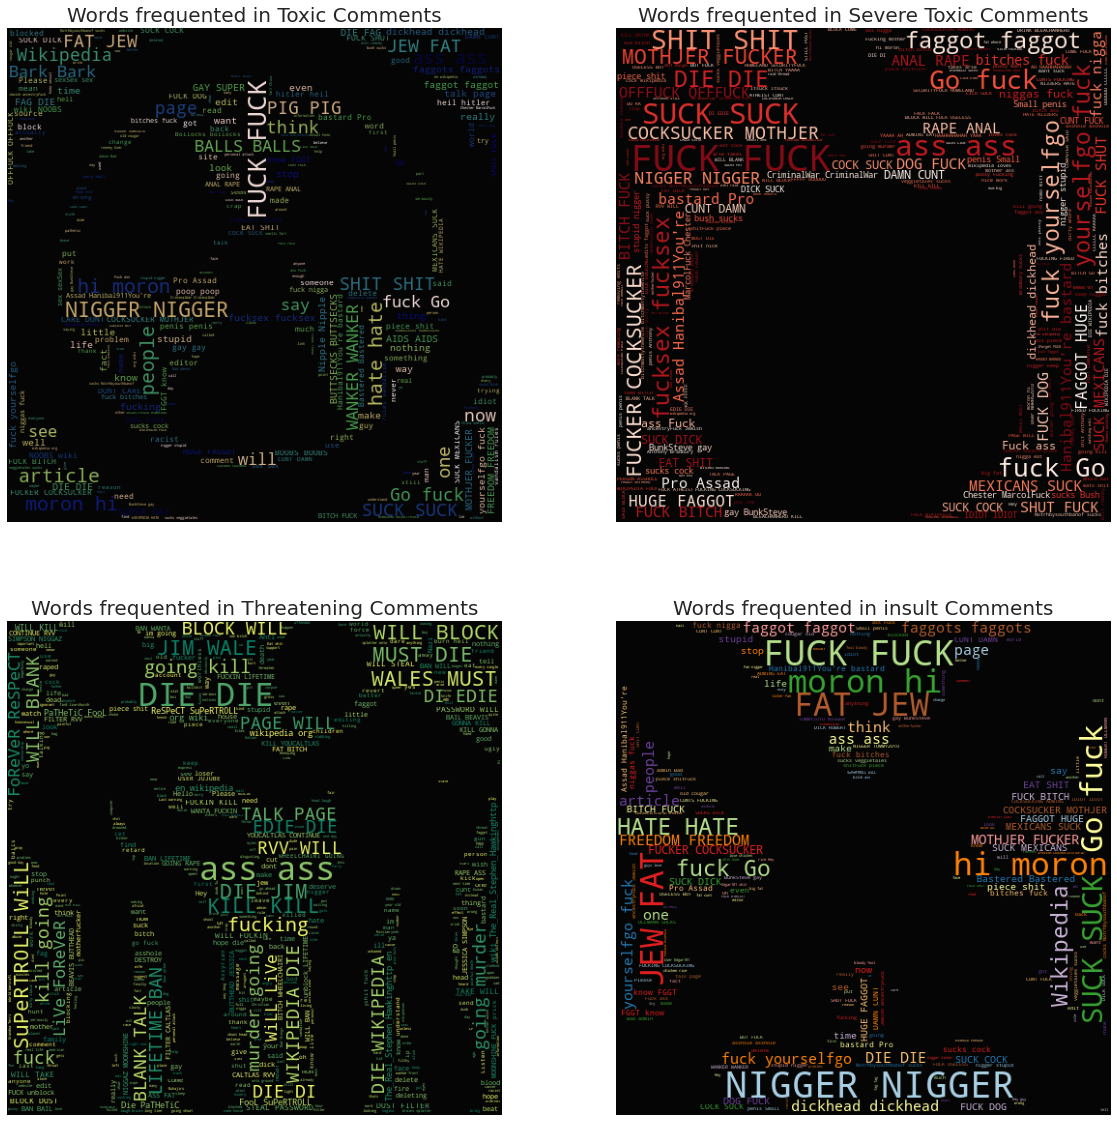

In [48]:
toxic_mask=np.array(Image.open("toxic-sign.png"))
toxic_mask=toxic_mask[:,:,1]
#wordcloud for clean comments
subset=train[train.toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000,mask=toxic_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

#Severely toxic comments
plt.subplot(222)
severe_toxic_mask=np.array(Image.open("bomb.png"))
severe_toxic_mask=severe_toxic_mask[:,:,1]
subset=train[train.severe_toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=severe_toxic_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Severe Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

#Threat comments
plt.subplot(223)
threat_mask=np.array(Image.open("anger.png"))
threat_mask=threat_mask[:,:,1]
subset=train[train.threat==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=threat_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Threatening Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'summer' , random_state=2534), alpha=0.98)

#insult
plt.subplot(224)
insult_mask=np.array(Image.open("swords.png"))
insult_mask=insult_mask[:,:,1]
subset=train[train.insult==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=insult_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in insult Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)

plt.show()

https://www.kaggle.com/jagangupta/stop-the-s-toxic-comments-eda/data

### DATA LOADING

In [16]:
!ls

imdbdata  sample_data  toxicdata


In [17]:
!pip install kaggle

In [18]:
!ls

imdbdata  sample_data  toxicdata


In [19]:
!pwd

/content


In [20]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [21]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
import json
token = {"username":"esanvsh","key":"194c06d398339697b455b4551ac11af4"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

In [0]:
#!kaggle kernels list user 'esanvsh' - sort-by dateRun

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [31]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [33]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-11 13:32:24          49953  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           3051  
fireballbyedimyrnmom/us-counties-covid-19-dataset              US counties COVID 19 dataset                        428KB  2020-04-13 12:04:39           3519  
ryanxjhan/cbc-news-coronavirus-articles-march-26               CBC News Coronavirus/COVID-19 Articles (NLP)          6MB  2020-03-27 23:23:07            705  
bappekim/air-pollution-in-seoul               

In [34]:
!kaggle datasets list -s jigsaw

ref                                                       title                                               size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
kashnitsky/jigsaw-multilingual-toxic-test-translated      Jigsaw multilingual toxic - test & val translated   25MB  2020-03-30 16:04:03            168  
fizzbuzz/cleaned-toxic-comments                           Cleaned Toxic Comments                              44MB  2018-03-12 05:12:31           1550  
jigsaw-team/wikipedia-talk-labels-personal-attacks        Wikipedia Talk Labels: Personal Attacks             24MB  2018-10-31 10:30:49            117  
nicapotato/bad-bad-words                                  Bad Bad Words                                        7KB  2018-02-21 21:31:20           1202  
shivajbd/jigsawpuzzle                                     Jigsaw-Puzzle           

In [41]:
!mkdir /content/toxicdata
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge -p /content/toxicdata

mkdir: cannot create directory ‘/content/toxicdata’: File exists
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_labels.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
!ls

imdbdata  sample_data  toxicdata


In [0]:
!mkdir /content/toxicdata/test
!chmod 777 /content/toxicdata/test

!mkdir /content/imdbdata/test
!chmod 777 /content/imdbdata/test

In [0]:
!mkdir /content/toxicdata/train
!chmod 777 /content/toxicdata/train

!mkdir /content/imdbdata/train
!chmod 777 /content/imdbdata/train

In [18]:
!unzip /content/toxicdata/test.csv.zip -d /content/toxicdata/test


Archive:  test.csv.zip
  inflating: ./test/test.csv         


In [19]:
!unzip /content/toxicdata/train.csv.zip -d /content/toxicdata/train

Archive:  train.csv.zip
  inflating: ./train/train.csv       


In [20]:
!ls

sample_data		   test		 test_labels.csv.zip  train.csv.zip
sample_submission.csv.zip  test.csv.zip  train


In [21]:
!ls /content/toxicdata/test
!ls /content/toxicdata/train

test.csv
train.csv


### ABOUT DATA

Data Overview:

The dataset here is from wiki corpus dataset which was rated by human raters for toxicity. The corpus contains 63M comments from discussions relating to user pages and articles dating from 2004-2015.

Different platforms/sites can have different standards for their toxic screening process. Hence the comments are tagged in the following five categories

toxic
severe_toxic
obscene
threat
insult
identity_hate
The tagging was done via crowdsourcing which means that the dataset was rated by different people and the tagging might not be 100% accurate too.

In [22]:
!pip install scipy

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
train = pd.read_csv("train/train.csv")
test = pd.read_csv("test/test.csv")

In [4]:
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


Loading Glove vector 300 dim

In [27]:
#!wget https://gist.githubusercontent.com/bastings/b094de2813da58056a05e8e7950d4ad1/raw/3fbd3976199c2b88de2ae62afc0ecc6f15e6f7ce/glove.840B.300d.sst.txt
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip

--2020-04-14 06:05:56--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2020-04-14 06:05:56--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2020-04-14 06:05:57--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

In [28]:
!unzip glove.840B.300d.zip

Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [29]:
!ls

glove.840B.300d.txt  sample_submission.csv.zip	test_labels.csv.zip
glove.840B.300d.zip  test			train
sample_data	     test.csv.zip		train.csv.zip


In [0]:
EMBEDDING_FILE = 'glove.840B.300d.txt'
train = pd.read_csv('train/train.csv')
test = pd.read_csv('test/test.csv')

In [0]:
train["comment_text"].fillna("fillna")
test["comment_text"].fillna("fillna")
X_train = train["comment_text"].str.lower()
y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

X_test = test["comment_text"].str.lower()

In [32]:
print('='*120)
print('X_train')
print(type(X_train))
print(len(X_train))
print(len(X_train[0]))
print(len(X_train[1]))
print(X_train[0])
print('='*120)
print('y_train')
print(type(y_train))
print(len(y_train))
print(len(y_train[0]))
print(y_train[0])
print('='*120)
print('X_test')
print(type(X_test))
print(len(X_test))
print(len(X_test[0]))
print(len(X_test[1]))
print(X_test[0])
print('='*120)

X_train
<class 'pandas.core.series.Series'>
159571
264
112
explanation
why the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27
y_train
<class 'numpy.ndarray'>
159571
6
[0 0 0 0 0 0]
X_test
<class 'pandas.core.series.Series'>
153164
367
50
yo bitch ja rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,


### DATA PREPARATION

In [0]:
max_features=100000
maxlen=150
embed_size=300

In [3]:
from keras.preprocessing import text, sequence


Using TensorFlow backend.


In [0]:
tok=text.Tokenizer(num_words=max_features,lower=True)
# 
tok.fit_on_texts(list(X_train)+list(X_test))
X_train=tok.texts_to_sequences(X_train)
X_test=tok.texts_to_sequences(X_test)
x_train=sequence.pad_sequences(X_train,maxlen=maxlen)
x_test=sequence.pad_sequences(X_test,maxlen=maxlen)
word_index = tok.word_index

In [0]:
#EMBEDDING MATRIX
embeddings_index = {}
with open(EMBEDDING_FILE,encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [0]:
#prepare embedding matrix
num_words = min(max_features, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embed_size))
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


In [0]:
from sklearn.model_selection import train_test_split
X_tra, X_val, y_tra, y_val = train_test_split(x_train, y_train, train_size=0.9, random_state=233)


In [0]:
print(len(X_tra))
print(len(X_val))
print(len(y_tra))
print(len(y_val))

In [0]:
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()
        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: {:d} - score: {:.6f}".format(epoch+1, score))

## IMPORT LIBRARIES

In [0]:
import os
from keras.layers import Dense,Input,LSTM,Bidirectional,Activation,Conv1D,GRU
from keras.callbacks import Callback
from keras.layers import Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten

from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
from keras.optimizers import Adam

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


## MODEL 1: --> BIDIRECTIONAL LSTM with CONVOLUTION Keras

In [0]:
# VARIABLES
max_features=100000
maxlen=150
embed_size=300
batch_size = 128
epochs = 4

In [140]:
sequence_input1 = Input(shape=(maxlen, ))
# Now we pass it to our Embedding layer, 
# where we use the "weights" parameter to indicate the use of the pretrained embedding weights we have loaded 
# and the "trainable" parameter to tell Keras not to retrain the embedding layer.
x1 = Embedding(max_features, embed_size, weights=[embedding_matrix],trainable = False)(sequence_input1)
x1 = SpatialDropout1D(0.2)(x1)
# Here, we pass it to Bidirectional LSTM because there are several kernels which shows a decent gain in accuracy by using Bidirectional LSTM.
# The greatest advantage in using Bidirectional LSTM is that when it runs backwards you preserve information from the future 
# and using the two hidden states combined, you are able in any point in time to preserve information from both past and future.
x1 = Bidirectional(GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(x1)
x1 = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(x1)
avg_pool1 = GlobalAveragePooling1D()(x1)
max_pool1 = GlobalMaxPooling1D()(x1)
x1 = concatenate([avg_pool1, max_pool1])
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.1)(x)
preds1 = Dense(6, activation="sigmoid")(x1)
model1 = Model(sequence_input, preds1)
model1.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy'])
print(model1.summary())

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 150)          0                                            
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 150, 300)     30000000    input_10[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_2 (SpatialDro (None, 150, 300)     0           embedding_10[0][0]               
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 150, 256)     329472      spatial_dropout1d_2[0][0]        
____________________________________________________________________________________________

In [0]:
modelpath1="model1_keras_bigru_.h5"
checkpoint1 = ModelCheckpoint(modelpath1, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early1 = EarlyStopping(monitor="val_acc", mode="max", patience=5)
ra_val1 = RocAucEvaluation(validation_data=(X_val, y_val), interval = 1)
callbacks_list1 = [ra_val1,checkpoint1, early1]

In [142]:
model1.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks = callbacks_list1,verbose=1)


Train on 143613 samples, validate on 15958 samples
Epoch 1/4
143613/143613 [==============================] - 1627s 11ms/step - loss: 0.2305 - accuracy: 0.9791 - val_loss: 0.0496 - val_accuracy: 0.9816

 ROC-AUC - epoch: 1 - score: 0.981933

Epoch 00001: val_accuracy improved from -inf to 0.98163, saving model to keras_bigru_.h5
Epoch 2/4
143613/143613 [==============================] - 1631s 11ms/step - loss: 0.3591 - accuracy: 0.9812 - val_loss: 0.0622 - val_accuracy: 0.9785

 ROC-AUC - epoch: 2 - score: 0.980823

Epoch 00002: val_accuracy did not improve from 0.98163
Epoch 3/4
143613/143613 [==============================] - 1614s 11ms/step - loss: 7.1922 - accuracy: 0.9790 - val_loss: 0.0648 - val_accuracy: 0.9780

 ROC-AUC - epoch: 3 - score: 0.909116

Epoch 00003: val_accuracy did not improve from 0.98163
Epoch 4/4
143613/143613 [==============================] - 1602s 11ms/step - loss: 1.9891 - accuracy: 0.9783 - val_loss: 0.0624 - val_accuracy: 0.9801

 ROC-AUC - epoch: 4 - sco

In [0]:
#Loading model weights
model1.load_weights(modelpath1)
print('Predicting....')
y_pred1 = model1.predict(x_test,batch_size=1024,verbose=1)

## MODEL 2 : --> WITH ATTENTION

In [0]:
# VARIABLES
max_features=100000
maxlen=150
embed_size=300
batch_size = 128
epochs = 4

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
from keras.layers import Dense,Input,LSTM,Bidirectional,Activation,Conv1D,GRU
from keras.callbacks import Callback
from keras.layers import Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten
from keras.preprocessing import text, sequence
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
#print(os.listdir("../input"))


In [0]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        """
        Keras Layer that implements an Attention mechanism for temporal data.
        Supports Masking.
        Follows the work of Raffel et al. [https://arxiv.org/abs/1512.08756]
        # Input shape
            3D tensor with shape: `(samples, steps, features)`.
        # Output shape
            2D tensor with shape: `(samples, features)`.
        :param kwargs:
        Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
        The dimensions are inferred based on the output shape of the RNN.
        Example:
            model.add(LSTM(64, return_sequences=True))
            model.add(Attention())
        """
        self.supports_masking = True
        #self.init = initializations.get('glorot_uniform')
        self.init = initializers.get('glorot_uniform')
        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)
        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)
        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        # eij = K.dot(x, self.W) TF backend doesn't support it
        # features_dim = self.W.shape[0]
        # step_dim = x._keras_shape[1]
        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())
        # in some cases especially in the early stages of training the sum may be almost zero
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        #print weigthted_input.shape
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        #return input_shape[0], input_shape[-1]
        return input_shape[0],  self.features_dim
#def get_config(self):
#return super(attention,self).get_config()



In [49]:
########################################
## define the model structure
########################################
sequence_input2 = Input(shape=(maxlen, ))
x2 = Embedding(max_features, embed_size, weights=[embedding_matrix],trainable = False)(sequence_input2)
x2 = LSTM(300, dropout=0.25, recurrent_dropout=0.25,return_sequences=True)(x2)
x2 = Dropout(0.25)(x2)
merged2 = Attention(maxlen)(x2)
merged2 = Dense(256, activation='relu')(merged2)
merged2 = Dropout(0.25)(merged2)
merged2 = BatchNormalization()(merged2)
preds2 = Dense(6, activation='sigmoid')(merged2)
model2 = Model(sequence_input2, preds2)
# We can try different optimizer as per our need
model2.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy'])
print(model2.summary())


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 300)          30000000  
_________________________________________________________________
lstm_2 (LSTM)                (None, 150, 300)          721200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 150, 300)          0         
_________________________________________________________________
attention_2 (Attention)      (None, 300)               450       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               77056     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0   

In [0]:
modelpath2 = 'model2_keras_attention_lstm.h5'
checkpoint2 = ModelCheckpoint(modelpath2, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early2 = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
ra_val2 = RocAucEvaluation(validation_data=(X_val, y_val), interval = 1)
callbacks_list2 = [ra_val2,checkpoint2, early2]

In [54]:
model2.fit(X_tra, y_tra, batch_size=256, epochs=5, validation_data=(X_val, y_val), callbacks=callbacks_list2,verbose=1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/5
143613/143613 [==============================] - 229s 2ms/step - loss: 0.0474 - accuracy: 0.9821 - val_loss: 0.0447 - val_accuracy: 0.9832

 ROC-AUC - epoch: 1 - score: 0.984775

Epoch 00001: val_accuracy improved from -inf to 0.98322, saving model to keras_attention_lstm.h5
Epoch 2/5
143613/143613 [==============================] - 230s 2ms/step - loss: 0.0455 - accuracy: 0.9828 - val_loss: 0.0455 - val_accuracy: 0.9830

 ROC-AUC - epoch: 2 - score: 0.986330

Epoch 00002: val_accuracy did not improve from 0.98322
Epoch 3/5
143613/143613 [==============================] - 230s 2ms/step - loss: 0.0439 - accuracy: 0.9831 - val_loss: 0.0420 - val_accuracy: 0.9841

 ROC-AUC - epoch: 3 - score: 0.987236

Epoch 00003: val_accuracy improved from 0.98322 to 0.98408, saving model to keras_attention_lstm.h5
Epoch 4/5
143613/143613 [==============================] - 228s 2ms/step - loss: 0.0429 - accuracy: 0.9836 - val_loss: 0.0420 - va

In [57]:
model2.load_weights(modelpath2)
print('Predicting....')
y_pred2 = model2.predict(x_test,batch_size=1024,verbose=1)
#bst_val_loss_score1 = min(hist1.history['val_loss'])
#bst_val_acc_score1 = max(hist1.history['val_acc'])

Predicting....
153164/153164 [==============================] - 11s 69us/step


## MODEL3 : --> ATTENTION WITH CONTEXT

In [0]:
# VARIABLES
max_features=100000
maxlen=150
embed_size=300
batch_size = 128
epochs = 4

In [0]:
def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatible with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)

class AttentionWithContext(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Note: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

In [60]:
########################################
## define the model structure
########################################
sequence_input3 = Input(shape=(maxlen, ))
x3 = Embedding(max_features, embed_size, weights=[embedding_matrix],trainable = False)(sequence_input3)
x3 = LSTM(300, dropout=0.25, recurrent_dropout=0.25,return_sequences=True)(x3)
x3 = Dropout(0.25)(x3)
merged3 = AttentionWithContext()(x3)
merged3 = Dense(256, activation='relu')(merged3)
merged3 = Dropout(0.25)(merged3)
merged3 = BatchNormalization()(merged3)
preds3 = Dense(6, activation='sigmoid')(merged3)
model3 = Model(sequence_input2, preds3)
# We can try different optimizer as per our need
model3.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy'])
print(model3.summary())


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 150, 300)          30000000  
_________________________________________________________________
lstm_4 (LSTM)                (None, 150, 300)          721200    
_________________________________________________________________
dropout_6 (Dropout)          (None, 150, 300)          0         
_________________________________________________________________
attention_with_context_2 (At (None, 300)               90600     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               77056     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0   

In [0]:
modelpath3 = 'model3_keras_attention_wc_lstm.h5'
checkpoint3 = ModelCheckpoint(modelpath3, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early3 = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
ra_val3 = RocAucEvaluation(validation_data=(X_val, y_val), interval = 1)
callbacks_list3 = [ra_val3,checkpoint3, early3]

In [64]:
model3.fit(X_tra, y_tra, batch_size=256, epochs=5, validation_data=(X_val, y_val), callbacks=callbacks_list3,verbose=1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/5
143613/143613 [==============================] - 232s 2ms/step - loss: 0.0503 - accuracy: 0.9812 - val_loss: 0.0457 - val_accuracy: 0.9827

 ROC-AUC - epoch: 1 - score: 0.983039

Epoch 00001: val_accuracy improved from -inf to 0.98275, saving model to keras_attention_wc_lstm.h5
Epoch 2/5
143613/143613 [==============================] - 232s 2ms/step - loss: 0.0472 - accuracy: 0.9823 - val_loss: 0.0439 - val_accuracy: 0.9834

 ROC-AUC - epoch: 2 - score: 0.985223

Epoch 00002: val_accuracy improved from 0.98275 to 0.98345, saving model to keras_attention_wc_lstm.h5
Epoch 3/5
143613/143613 [==============================] - 230s 2ms/step - loss: 0.0452 - accuracy: 0.9829 - val_loss: 0.0432 - val_accuracy: 0.9835

 ROC-AUC - epoch: 3 - score: 0.986920

Epoch 00003: val_accuracy improved from 0.98345 to 0.98348, saving model to keras_attention_wc_lstm.h5
Epoch 4/5
143613/143613 [==============================] - 229s 2ms/step - l

In [0]:
model3.load_weights(modelpath3)
print('Predicting....')
y_pred3 = model3.predict(x_test,batch_size=1024,verbose=1)